[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                 comments  sentiment_score  \
0       Having the opportunity of arriving to Alexandr...           0.9940   
1       We have no enough words to describe how beauty...           0.6580   
2       The listing was exceptional and an even better...           0.9895   
3       Alexandra's home was amazing and in such a nea...           0.9673   
4       Beautiful home. Very comfortable and clean. Pe...           0.9787   
...                                                   ...              ...   
431835            Great location, great condo, great host           0.9231   
431836  I had an amazing stay at Dziyana’s. It was so ...           0.9401   
431837  This apartment is located at a prime location ...           0.7960   
431838  Very beautiful place and nice location, guest ...           0.8999   
431839  Very clean room and washroom, free of foreign ...           0.9402   

       sentiment  
0       positive  
1       positive  
2     

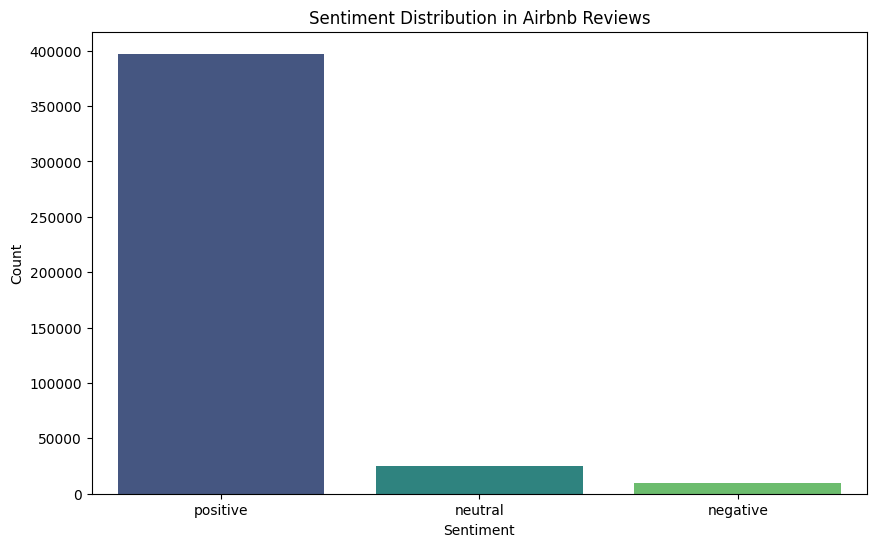

In [ ]:

#SENTIMENTAL ANALYSIS**
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns


# Download NLTK resources (you only need to do this once)
nltk.download('vader_lexicon')

# Load your Airbnb reviews data
reviews_df = pd.read_csv('/content/reviews.csv')

# Drop rows with NaN values in the 'comments' column
reviews_df = reviews_df.dropna(subset=['comments'])

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(comment):
    if isinstance(comment, str):  # Check if the comment is a string
        scores = sia.polarity_scores(comment)
        return scores['compound']
    else:
        return 0.0  # Return a neutral score for non-string values

# Apply the sentiment analysis function to the 'comments' column
reviews_df['sentiment_score'] = reviews_df['comments'].apply(get_sentiment_scores)

# Categorize sentiment into positive, neutral, or negative
reviews_df['sentiment'] = reviews_df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('neutral' if score == 0 else 'negative'))

# Display the results
print(reviews_df[['comments', 'sentiment_score', 'sentiment']])
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=reviews_df, palette='viridis')
plt.title('Sentiment Distribution in Airbnb Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Mean Squared Error: 158403.14
R-squared: 0.06


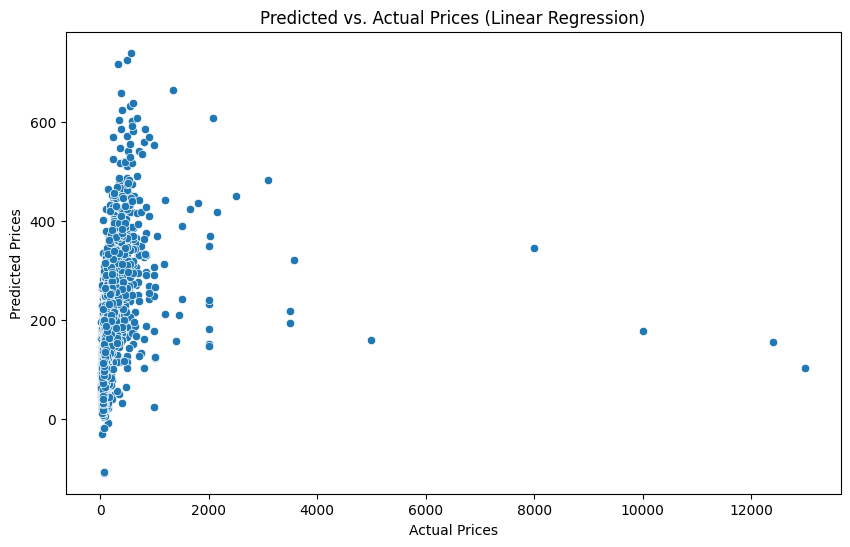

Mean Squared Error: 155336.70
R-squared: 0.08


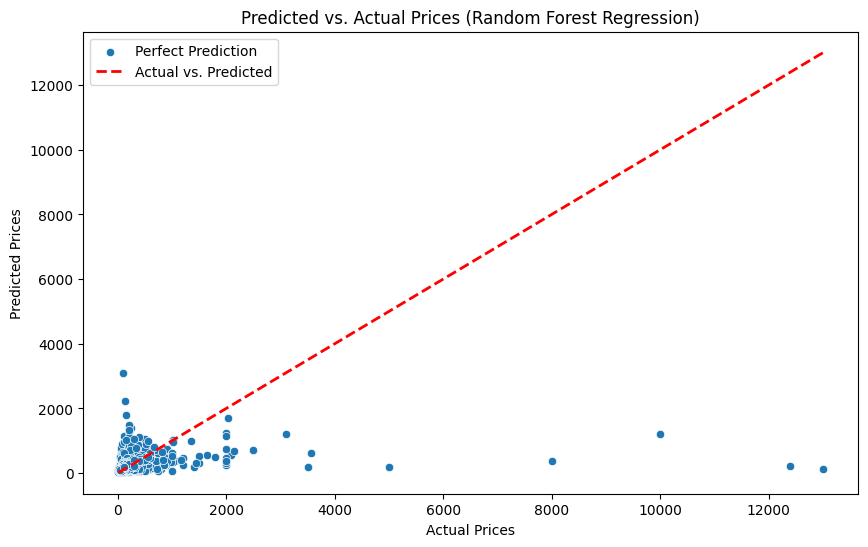

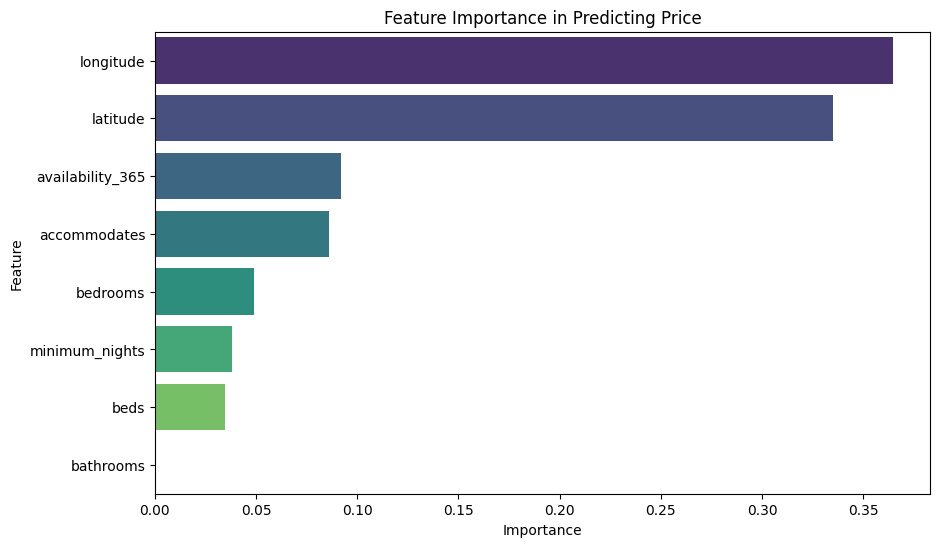

Mean Squared Error: 168425.48
R-squared: -0.00


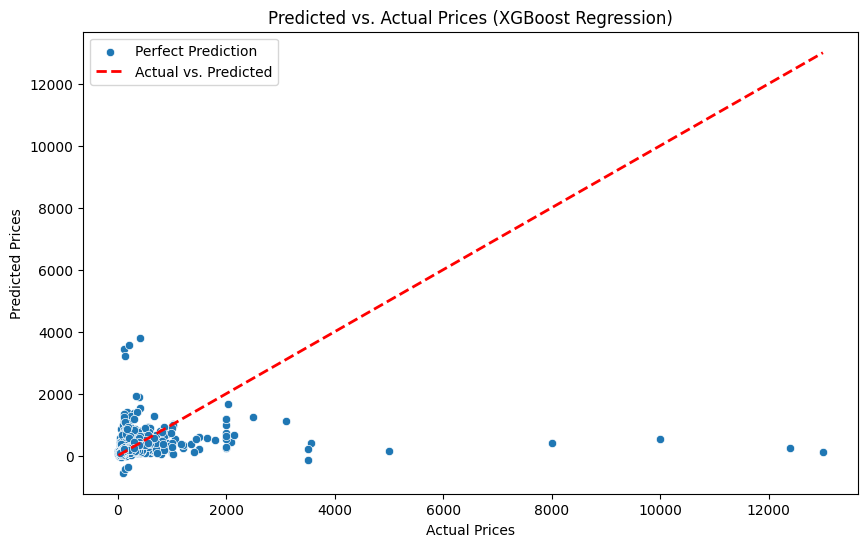

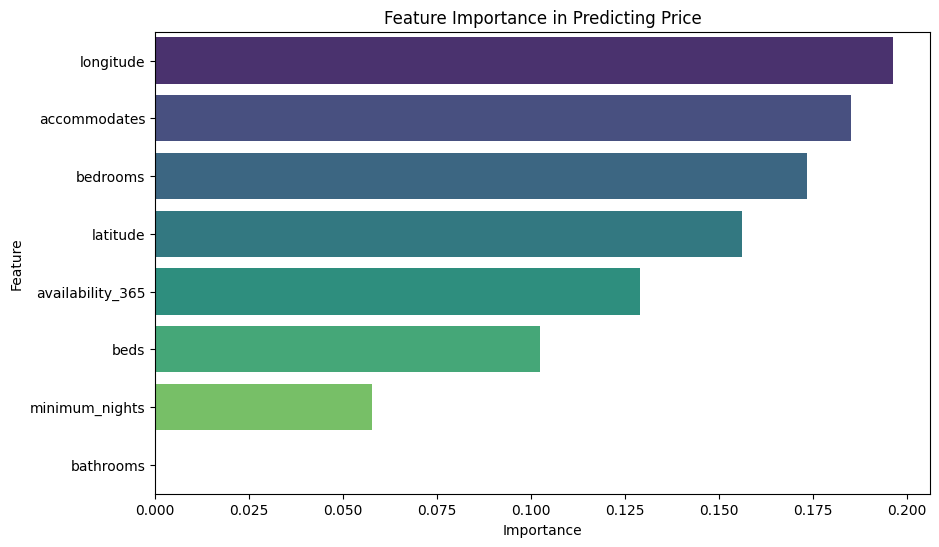

Mean Squared Error (Final Model): 42166.30
R-squared (Final Model): 0.75


"In this example:\n\nThe first step involves training a linear regression model (linear_model) on the original features and making predictions on the test set.\n\nThe second step involves training a random forest model (rf_model) on the residuals (the difference between the true prices and the linear regression predictions). This step aims to capture the patterns not captured by the linear model.\n\nThe final prediction is obtained by combining the predictions from the linear regression model and the random forest model.\n\nThis ensemble approach can be extended and customized based on the specific characteristics of your data and the task you're working on. Ensemble models often provide improved performance by leveraging the strengths of different models."

In [ ]:

#**PART 1**
#MODEL 1(Linear Regression)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your Airbnb listings data
listings_df = pd.read_csv('/content/listings.csv')

# Select features (adjust based on your specific columns)
features = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'latitude', 'longitude', 'minimum_nights', 'availability_365'
]

# Handle missing values if any
listings_df[features] = listings_df[features].fillna(0)

# Convert 'price' column to numeric
listings_df['price'] = pd.to_numeric(listings_df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Drop rows with missing 'price' values
listings_df = listings_df.dropna(subset=['price'])

# Define the target variable
target = 'price'

# Split the data into features (X) and target variable (y)
X = listings_df[features]
y = listings_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the predicted vs. actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predicted vs. Actual Prices (Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

#model 2(Random Forest Regression)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your Airbnb listings data
listings_df = pd.read_csv('listings.csv')

# Select features (adjust based on your specific columns)
features = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'latitude', 'longitude', 'minimum_nights', 'availability_365'
]

# Handle missing values if any
listings_df[features] = listings_df[features].fillna(0)

# Convert 'price' column to numeric
listings_df['price'] = pd.to_numeric(listings_df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Drop rows with missing 'price' values
listings_df = listings_df.dropna(subset=['price'])

# Define the target variable
target = 'price'

# Split the data into features (X) and target variable (y)
X = listings_df[features]
y = listings_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the predicted vs. actual prices with a line indicating a perfect prediction
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Predicted vs. Actual Prices (Random Forest Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(['Perfect Prediction', 'Actual vs. Predicted'])
plt.show()

# Visualize feature importance
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Predicting Price')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#MODEL 3(XGBoost Regression)
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your Airbnb listings data
listings_df = pd.read_csv('listings.csv')

# Select features (adjust based on your specific columns)
features = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'latitude', 'longitude', 'minimum_nights', 'availability_365'
]

# Handle missing values if any
listings_df[features] = listings_df[features].fillna(0)

# Convert 'price' column to numeric
listings_df['price'] = pd.to_numeric(listings_df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Drop rows with missing 'price' values
listings_df = listings_df.dropna(subset=['price'])

# Define the target variable
target = 'price'

# Split the data into features (X) and target variable (y)
X = listings_df[features]
y = listings_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regression model
model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the predicted vs. actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Predicted vs. Actual Prices (XGBoost Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(['Perfect Prediction', 'Actual vs. Predicted'])
plt.show()

# Visualize feature importance
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Predicting Price')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#**PART 2:Model system development**

#1: with linear regration  and rendom forest model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your Airbnb listings data
listings_df = pd.read_csv('listings.csv')

# Select features (adjust based on your specific columns)
features = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'latitude', 'longitude', 'minimum_nights', 'availability_365'
]

# Handle missing values if any
listings_df[features] = listings_df[features].fillna(0)

# Convert 'price' column to numeric
listings_df['price'] = pd.to_numeric(listings_df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Drop rows with missing 'price' values
listings_df = listings_df.dropna(subset=['price'])

# Define the target variable
target = 'price'

# Split the data into features (X) and target variable (y)
X = listings_df[features]
y = listings_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Step 2: Random Forest Model
# Using the residuals (difference between true and linear predicted values) as features
residuals = y_test - y_pred_linear
X_rf = pd.concat([X_test, pd.Series(residuals, name='residuals')], axis=1)

# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the residuals
rf_model.fit(X_rf, y_test)

# Make predictions on the test set using the combined models
y_pred_rf = rf_model.predict(X_rf)

# Final Prediction: Combine predictions from Linear Regression and Random Forest
final_predictions = y_pred_linear + y_pred_rf

# Evaluate the final model
mse_final = mean_squared_error(y_test, final_predictions)
r2_final = r2_score(y_test, final_predictions)

print(f'Mean Squared Error (Final Model): {mse_final:.2f}')
print(f'R-squared (Final Model): {r2_final:.2f}')

'''In this example:

The first step involves training a linear regression model (linear_model) on the original features and making predictions on the test set.

The second step involves training a random forest model (rf_model) on the residuals (the difference between the true prices and the linear regression predictions). This step aims to capture the patterns not captured by the linear model.

The final prediction is obtained by combining the predictions from the linear regression model and the random forest model.

This ensemble approach can be extended and customized based on the specific characteristics of your data and the task you're working on. Ensemble models often provide improved performance by leveraging the strengths of different models.'''



In [ ]:
X_train.describe()

,accommodates,bathrooms,bedrooms,beds,latitude,longitude,minimum_nights,availability_365
count,14397.000000,14397.0,14397.000000,14397.000000,14397.000000,14397.000000,14397.000000,14397.000000
mean,3.125234,0.0,1.414739,1.707578,43.682000,-79.397414,26.839272,147.613739
std,1.989784,0.0,0.899839,1.088438,0.048881,0.068761,36.458358,135.298357
min,1.000000,0.0,0.000000,0.000000,43.585750,-79.621200,1.000000,0.000000
25%,2.000000,0.0,1.000000,1.000000,43.646060,-79.427120,28.000000,6.000000
50%,2.000000,0.0,1.000000,1.000000,43.663449,-79.397325,28.000000,95.000000
75%,4.000000,0.0,2.000000,2.000000,43.705360,-79.374597,28.000000,283.000000
max,16.000000,0.0,9.000000,11.000000,43.837740,-79.127590,1124.000000,365.000000


In [ ]:
import pickle

# Save the final model to a pickle file
with open('final_model.pkl', 'wb') as file:
    pickle.dump((linear_model, rf_model), file)


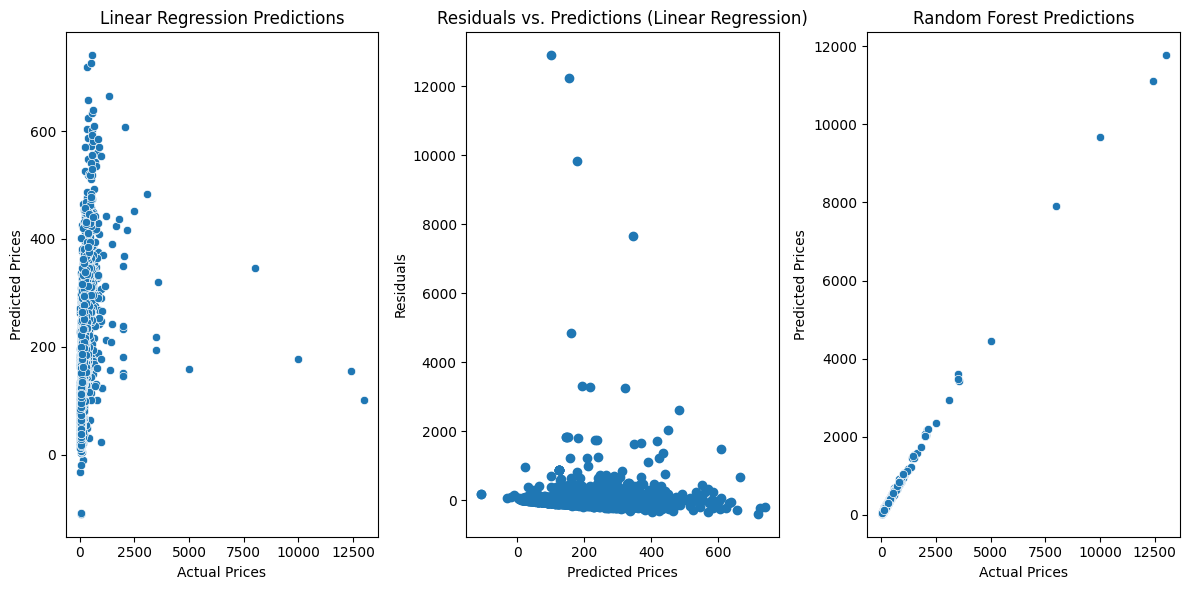

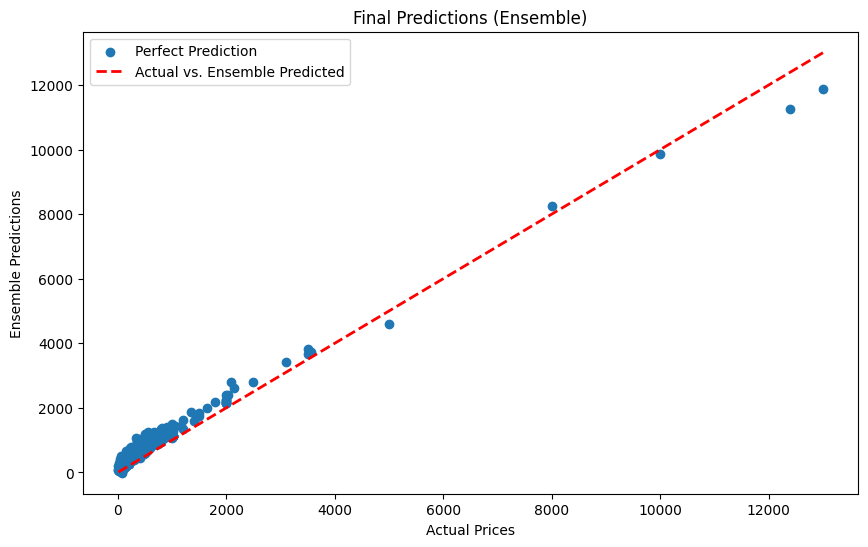

Mean Squared Error (Ensemble): 232148.46
R-squared (Ensemble): -0.38


ValueError: ignored

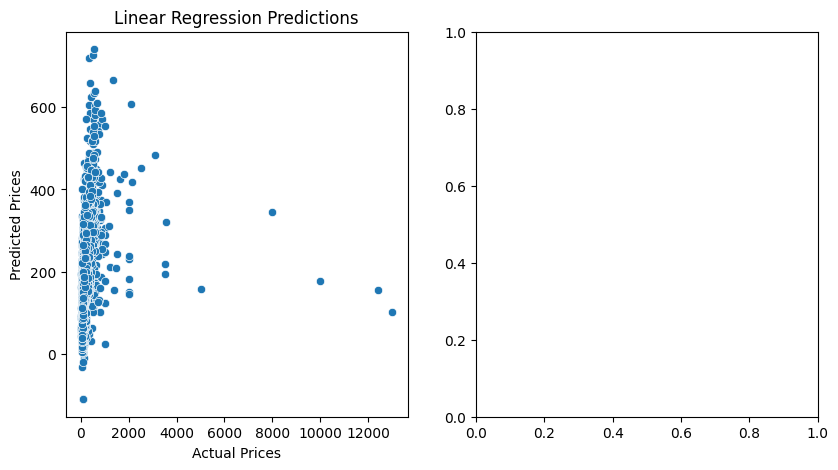

In [ ]:
import numpy as np

# Visualize the predictions from Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Visualize the residuals
plt.subplot(1, 3, 2)
plt.scatter(y_pred_linear, residuals)
plt.title('Residuals vs. Predictions (Linear Regression)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')

# Visualize the predictions from Random Forest
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.title('Random Forest Predictions')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()

# Visualize the final predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Final Predictions (Ensemble)')
plt.xlabel('Actual Prices')
plt.ylabel('Ensemble Predictions')
plt.legend(['Perfect Prediction', 'Actual vs. Ensemble Predicted'])
plt.show()
'''In the first set of plots:

The leftmost plot shows the predictions from the linear regression model. It helps visualize how well the linear model captures the relationships in the data.

The middle plot shows the residuals (the differences between actual and linear predicted prices) against the linear predictions. This can provide insights into areas where the linear model may not perform well.

The rightmost plot shows the predictions from the random forest model. It demonstrates how the random forest captures patterns that the linear model might miss.

In the second set of plots:

The scatter plot shows the final predictions from the ensemble model against the actual prices. The red dashed line represents a perfect prediction.
These visualizations can help you assess how each model contributes to the overall predictions and provide insights into potential improvements or areas where the ensemble model excels.'''
from sklearn.ensemble import RandomForestClassifier
# Instantiate the ensemble model
ensemble_model = RandomForestClassifier()  # You can use a different ensemble model here

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test)


# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f'Mean Squared Error (Ensemble): {mse_ensemble:.2f}')
print(f'R-squared (Ensemble): {r2_ensemble:.2f}')
'''
In this example:

Three individual models (Linear Regression, Random Forest, and XGBoost) are trained independently.
A VotingRegressor is used to create an ensemble model that combines the predictions from each individual model.
The ensemble model is trained on the same training data.
Predictions are made on the test set, and the performance of the ensemble model is evaluated.
Feel free to adapt this example to your specific use case and dataset. The combination of diverse models often leads to improved overall performance compared to individual models, as each model may capture different aspects of the underlying patterns in the data.'''

# Visualize the predictions from each individual model
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=linear_model.predict(X_test))
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Random Forest
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=rf_model.predict(X_test))
plt.title('Random Forest Predictions')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# XGBoost
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=xgb_model.predict(X_test))
plt.title('XGBoost Predictions')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()

# Visualize the predictions from the ensemble model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ensemble)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Ensemble Model Predictions')
plt.xlabel('Actual Prices')
plt.ylabel('Ensemble Predictions')
plt.legend(['Perfect Prediction', 'Actual vs. Ensemble Predicted'])
plt.show()
'''n the first set of plots:

The leftmost plot shows the predictions from the Linear Regression model.
The middle plot shows the predictions from the Random Forest model.
The rightmost plot shows the predictions from the XGBoost model.
In the second set of plots:

The scatter plot shows the predictions from the ensemble model against the actual prices. The red dashed line represents a perfect prediction.
These visualizations allow you to compare the predictions from each individual model and observe how the ensemble model combines them to create the final prediction. You can further analyze where each model excels or falls short and gain insights into the overall performance of the ensemble model.'''

#CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression
linear_cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
linear_cv_mse = -linear_cv_scores.mean()
print(f'Cross-validated MSE for Linear Regression: {linear_cv_mse:.2f}')

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), X, y, cv=5, scoring='neg_mean_squared_error')
rf_cv_mse = -rf_cv_scores.mean()
print(f'Cross-validated MSE for Random Forest: {rf_cv_mse:.2f}')


Cross-validated MSE for Linear Regression: 111124.65
Cross-validated MSE for Random Forest: 122879.69


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]           # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest model
rf_model_tuned = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Mean Squared Error (Best Random Forest Model): {mse_best_rf:.2f}')
print(f'R-squared (Best Random Forest Model): {r2_best_rf:.2f}')


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error (Best Random Forest Model): 84214.92
R-squared (Best Random Forest Model): 0.40


In [ ]:
import pickle
# Save the trained model and GridSearchCV object to a pickle file
with open('best_rf_model_and_gridsearch.pkl', 'wb') as file:
    pickle.dump((grid_search, grid_search.best_estimator_), file)